In [1]:
# Importing libraries
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_palette("husl")

os.makedirs("figures", exist_ok=True)

In [3]:
def load_data():
    df = pd.read_csv(
        "../../1_datasets/processed_data/FRBNY_SCE_Credit_Access_cleaned.csv"
    )
    return df

In [4]:
def overview_and_visualizations(df):
    # Overview: histograms for all numeric columns except IDs
    numeric_cols = [
        col
        for col in df.select_dtypes(include=[np.number]).columns
        if not col.endswith("id")
    ]
    fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4 * len(numeric_cols)))
    if len(numeric_cols) == 1:
        axes = [axes]
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
    plt.tight_layout()
    plt.savefig("figures/frbny_numeric_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="RdYlBu_r", fmt=".2f", square=True)
    plt.title("Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.savefig("figures/frbny_correlation_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()

    # Barplot: product ownership
    product_cols = [col for col in df.columns if col.startswith("has_")]
    if product_cols:
        product_means = df[product_cols].mean().sort_values()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=product_means.values, y=product_means.index, orient="h")
        plt.title("Share of Respondents with Each Credit Product")
        plt.xlabel("Share")
        plt.ylabel("Product")
        plt.tight_layout()
        plt.savefig("figures/frbny_product_ownership.png")
        plt.show()

    # Barplot: respondent count by month
    if "Month" in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x="Month", data=df)
        plt.title("Respondent Count by Month")
        plt.xlabel("Month")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig("figures/frbny_respondent_by_month.png")
        plt.show()

    # Time-based analysis: create 'PeriodTS' if 'Year' and 'Quarter' exist
    if "Year" in df.columns and "Quarter" in df.columns:
        df["PeriodTS"] = pd.PeriodIndex(
            df["Year"].astype(str) + "Q" + df["Quarter"].astype(str), freq="Q"
        ).to_timestamp()
        # Line plot: mean of each numeric column over time
        numeric_cols_time = [
            col
            for col in df.select_dtypes(include=[np.number]).columns
            if not col.endswith("id")
        ]
        plt.figure(figsize=(12, 6))
        for col in numeric_cols_time:
            mean_by_period = df.groupby("PeriodTS")[col].mean()
            plt.plot(mean_by_period.index, mean_by_period.values, label=col)
        plt.title("Trends in Numeric Features Over Time")
        plt.xlabel("Period")
        plt.ylabel("Mean Value")
        plt.legend()
        plt.tight_layout()
        plt.savefig(
            "figures/frbny_numeric_trends_over_time.png", dpi=300, bbox_inches="tight"
        )
        plt.show()
        # Line plot: product ownership over time
        product_cols_time = [col for col in df.columns if col.startswith("has_")]
        if product_cols_time:
            plt.figure(figsize=(12, 6))
            for col in product_cols_time:
                mean_by_period = df.groupby("PeriodTS")[col].mean()
                plt.plot(mean_by_period.index, mean_by_period.values, label=col)
            plt.title("Product Ownership Trends Over Time")
            plt.xlabel("Period")
            plt.ylabel("Share of Respondents")
            plt.legend()
            plt.tight_layout()
            plt.savefig(
                "figures/frbny_product_ownership_trends_over_time.png",
                dpi=300,
                bbox_inches="tight",
            )
            plt.show()

    return numeric_cols, product_cols

In [5]:
def group_analysis(df, product_cols):
    # Analyze by product ownership
    for col in product_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=2, kde=False)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(f"figures/frbny_{col}_distribution.png")
        plt.show()

In [6]:
def summary_statistics(df, numeric_cols):
    print("\n" + "=" * 60)
    print("📊 SUMMARY STATISTICS")
    print("=" * 60)
    print("\n📈 Summary statistics for numeric columns:")
    print(df[numeric_cols].describe())
    # Percentage breakdown for binary/categorical columns
    for col in df.columns:
        if df[col].nunique() <= 10 and df[col].dtype in [int, float]:
            print(f"\nPercentage breakdown for {col}:")
            print(df[col].value_counts(normalize=True) * 100)

In [7]:
def save_processed_data(df):
    df.to_csv("figures/frbny_explored.csv", index=False)
    print(
        "\n✅ Exploration complete! Processed data saved to 'figures/frbny_explored.csv'"
    )
    print("📊 Visualizations saved as PNG files in the 'figures/' directory")

In [8]:
def main():
    df = load_data()
    numeric_cols, product_cols = overview_and_visualizations(df)
    group_analysis(df, product_cols)
    summary_statistics(df, numeric_cols)
    save_processed_data(df)

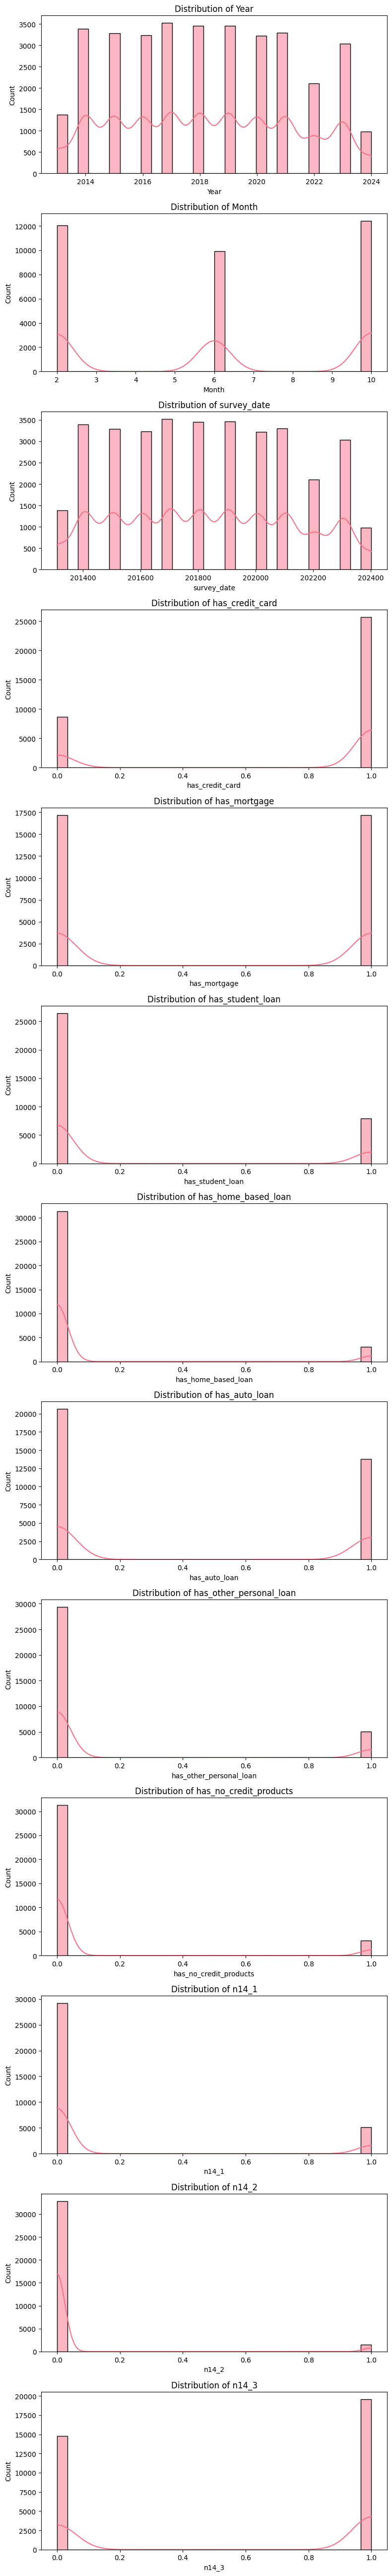

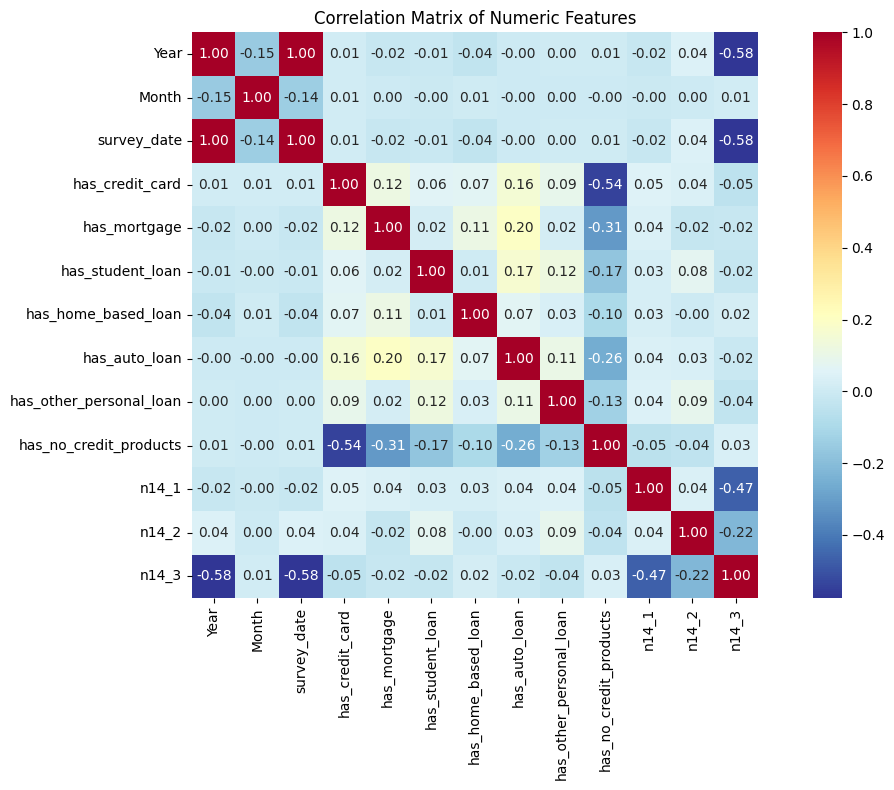

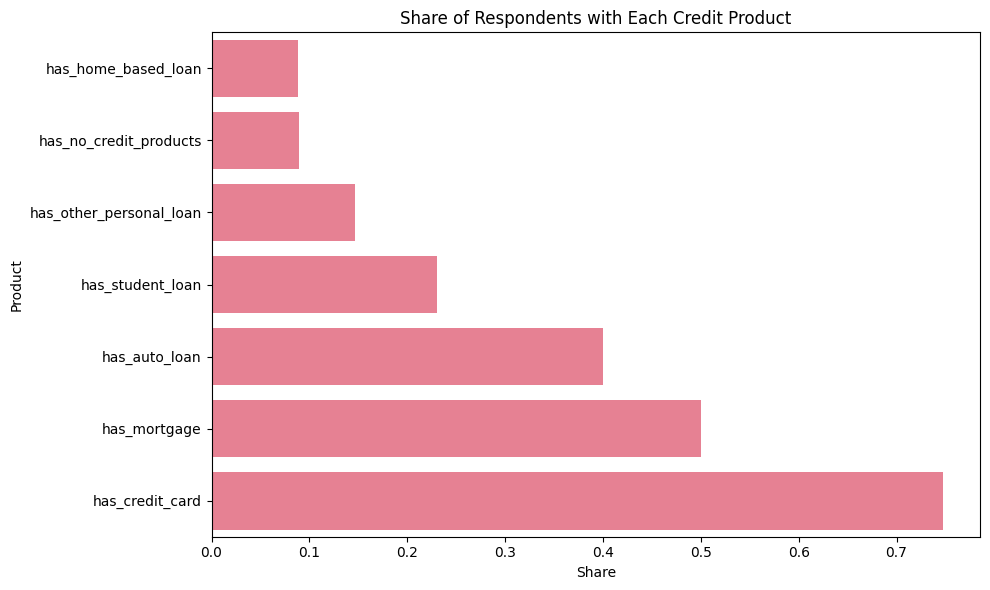

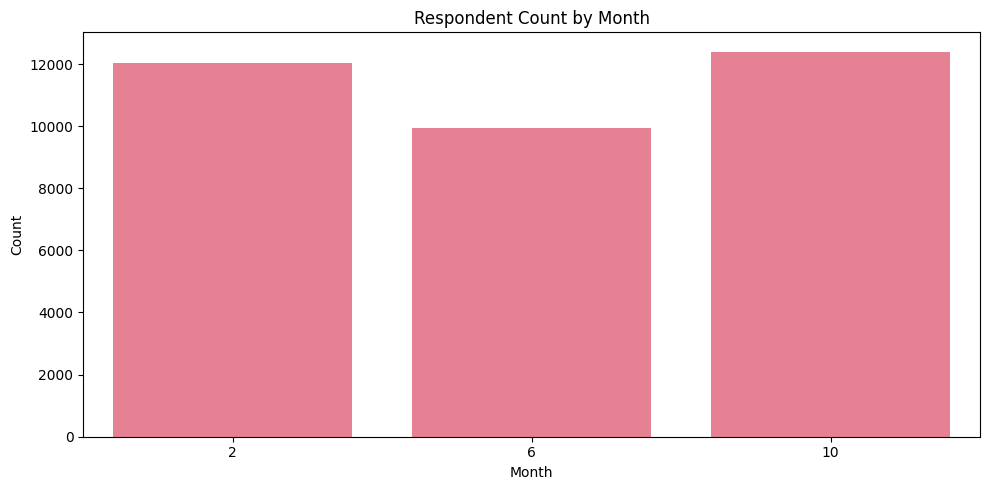

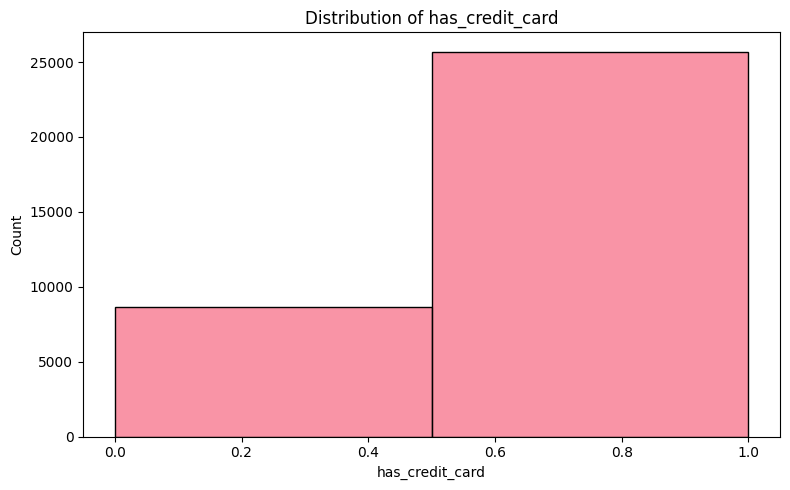

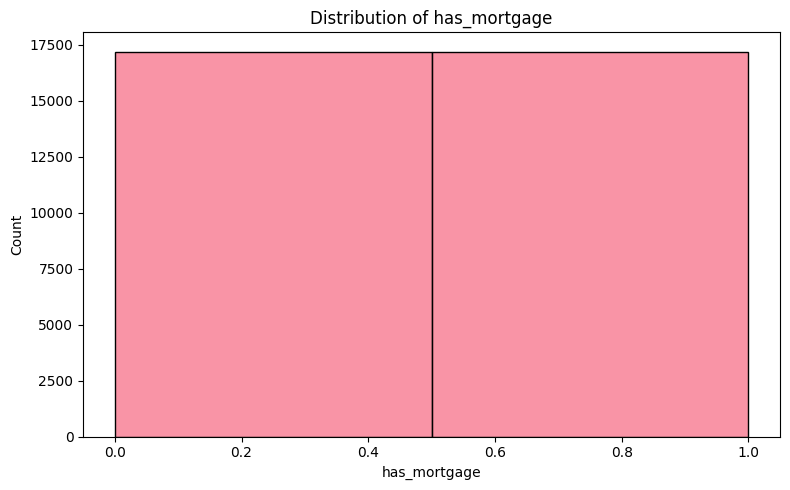

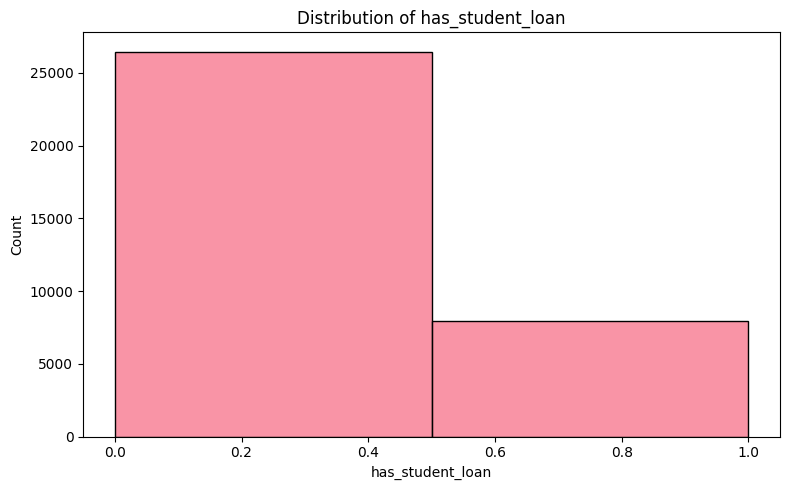

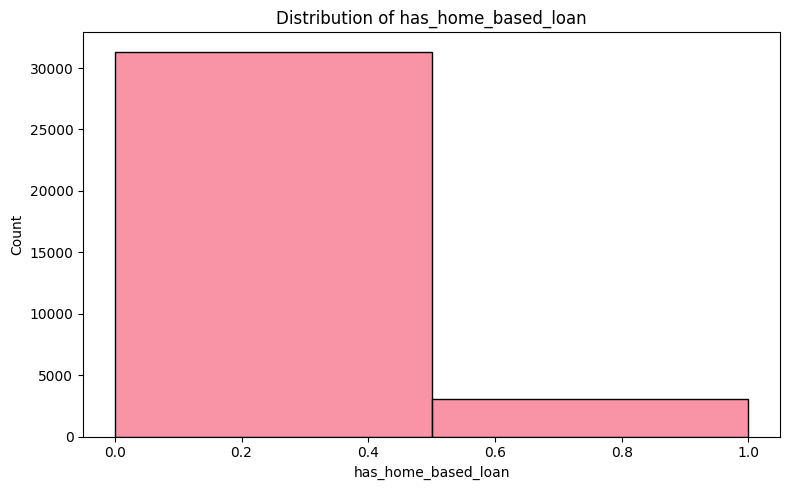

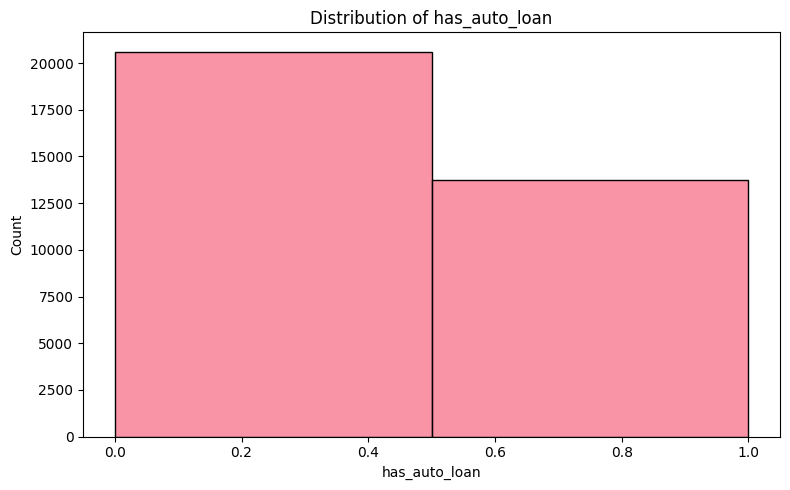

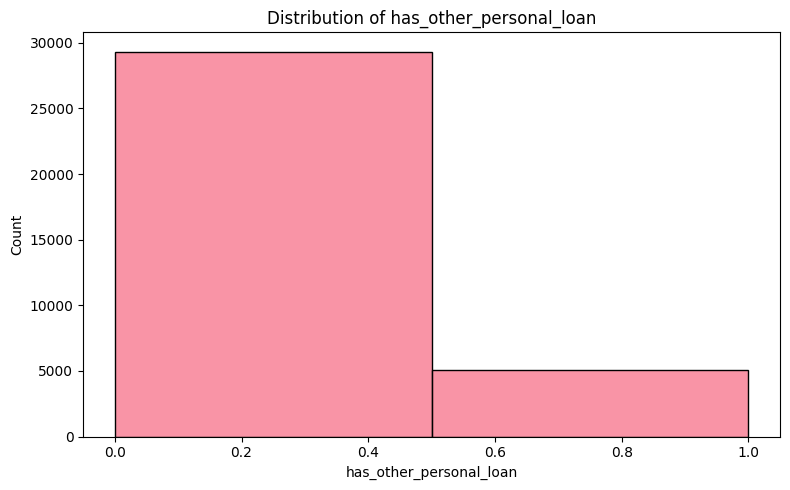

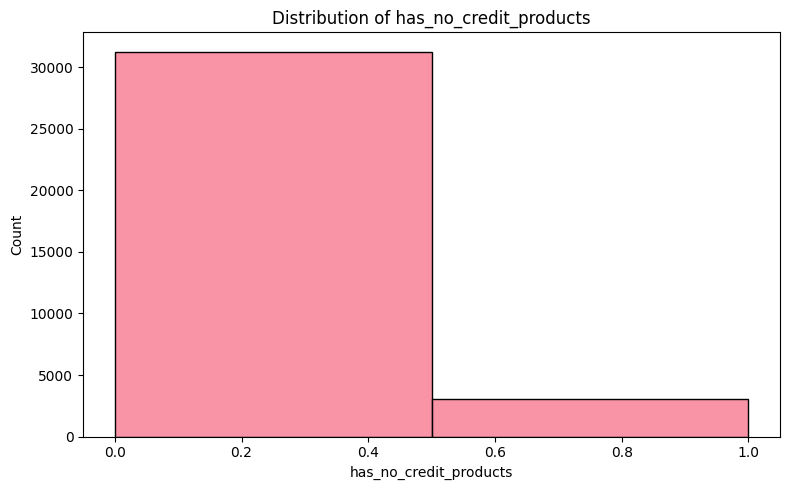


📊 SUMMARY STATISTICS

📈 Summary statistics for numeric columns:
               Year         Month    survey_date  has_credit_card  \
count  34362.000000  34362.000000   34362.000000      34362.00000   
mean    2018.261393      6.043071  201832.182411          0.74789   
std        3.067341      3.372511     306.235988          0.43423   
min     2013.000000      2.000000  201310.000000          0.00000   
25%     2016.000000      2.000000  201602.000000          0.00000   
50%     2018.000000      6.000000  201810.000000          1.00000   
75%     2021.000000     10.000000  202102.000000          1.00000   
max     2024.000000     10.000000  202402.000000          1.00000   

       has_mortgage  has_student_loan  has_home_based_loan  has_auto_loan  \
count  34362.000000      34362.000000         34362.000000   34362.000000   
mean       0.499913          0.230167             0.087888       0.400035   
std        0.500007          0.420946             0.283136       0.489912   
min  

In [9]:
if __name__ == "__main__":
    main()